# Lab 2

- Statistical summary of data
- Correlation of data
- Deal with categorical data
- Deal with missing data
- Normalise data

# Imports 

In [1]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data setup

Link to data: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

## Data Attributes

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
data_math = pd.read_csv(r"./Data/student-mat.csv")
data_port = pd.read_csv(r"./Data/student-por.csv")

In [3]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Maybe add class attribute if combining
data_math["class"] = "math"
data_port["class"] = "portuguese"

df = pd.concat([data_math, data_port], ignore_index=True)
df.to_csv("Data/comb_data.csv", index = False)

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


#### To be decided by group

In [7]:
#combine the G scores?

# G3 seems like it is already the combined value
# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20)
# G3 - final grade (numeric: from 0 to 20, output target)

# df["score"] = (df["G1"] + df["G2"] + df["G3"]) / 3
# df.drop(["G1","G2","G3"], axis = 1, inplace = True)

# Statistical Summary and Correlation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


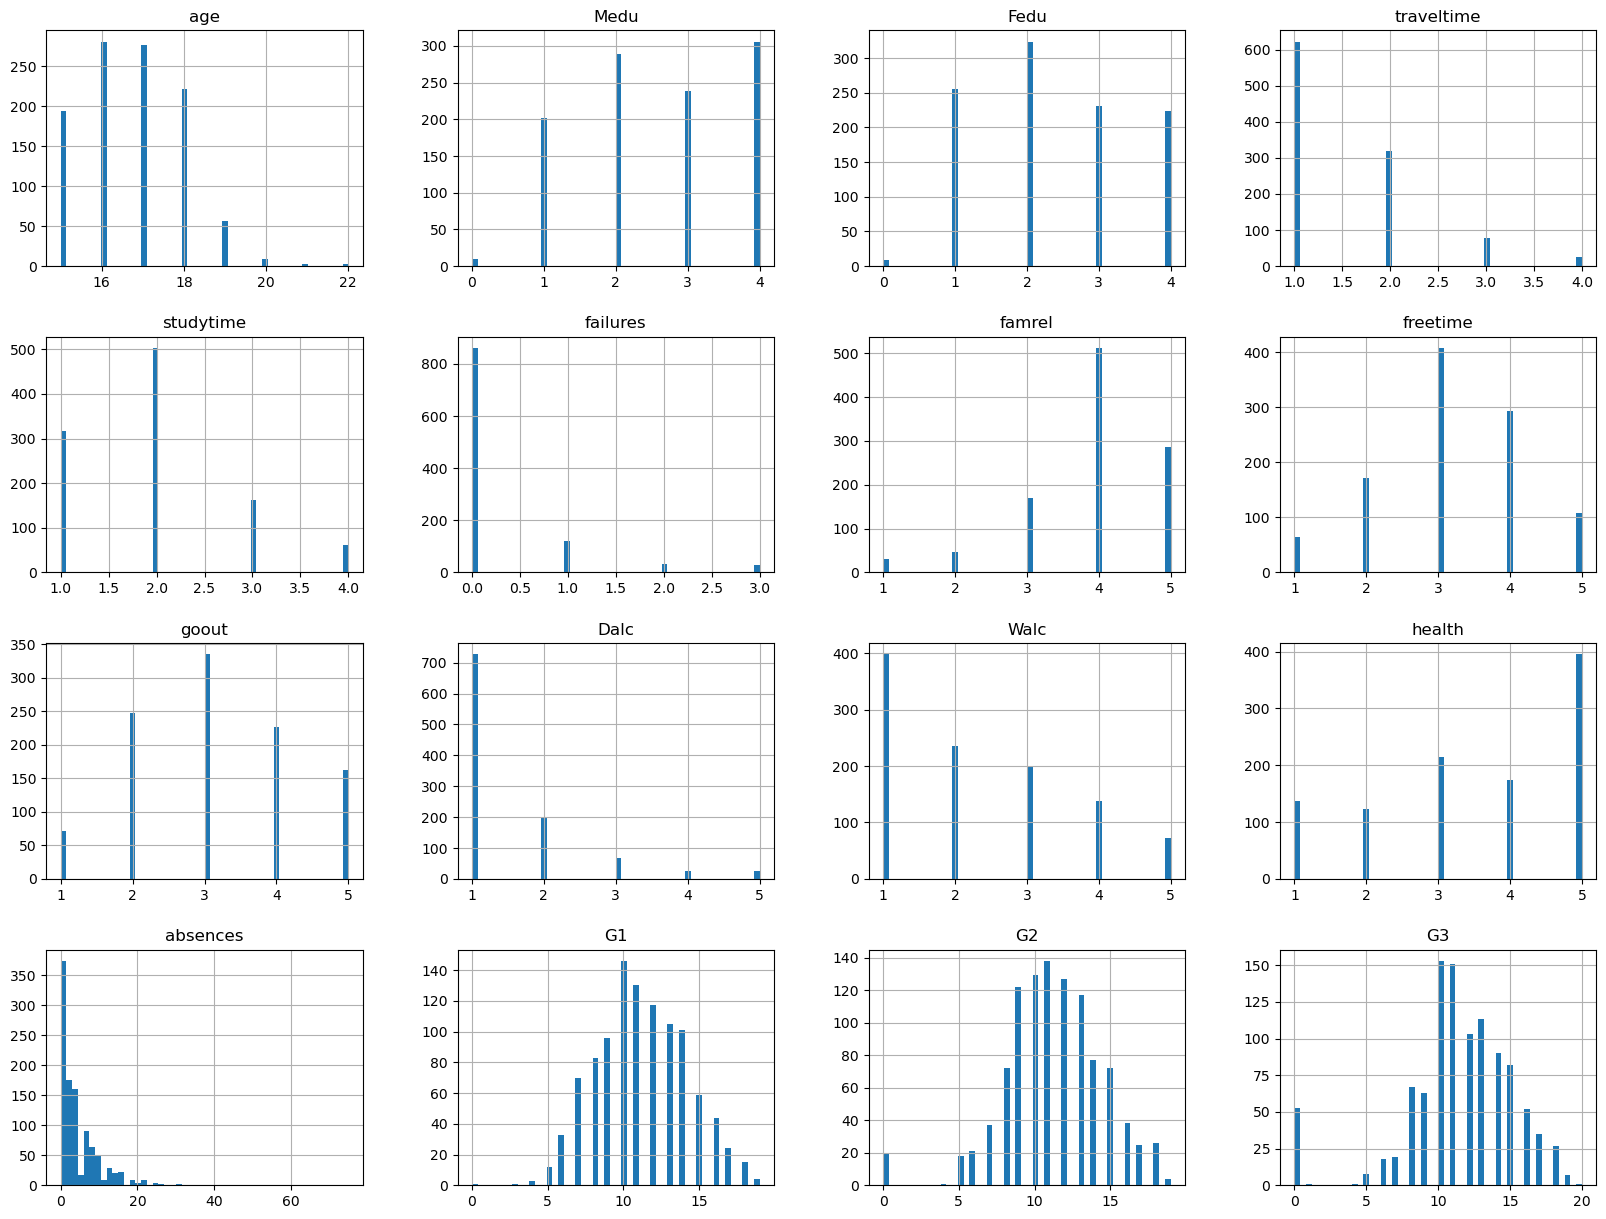

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

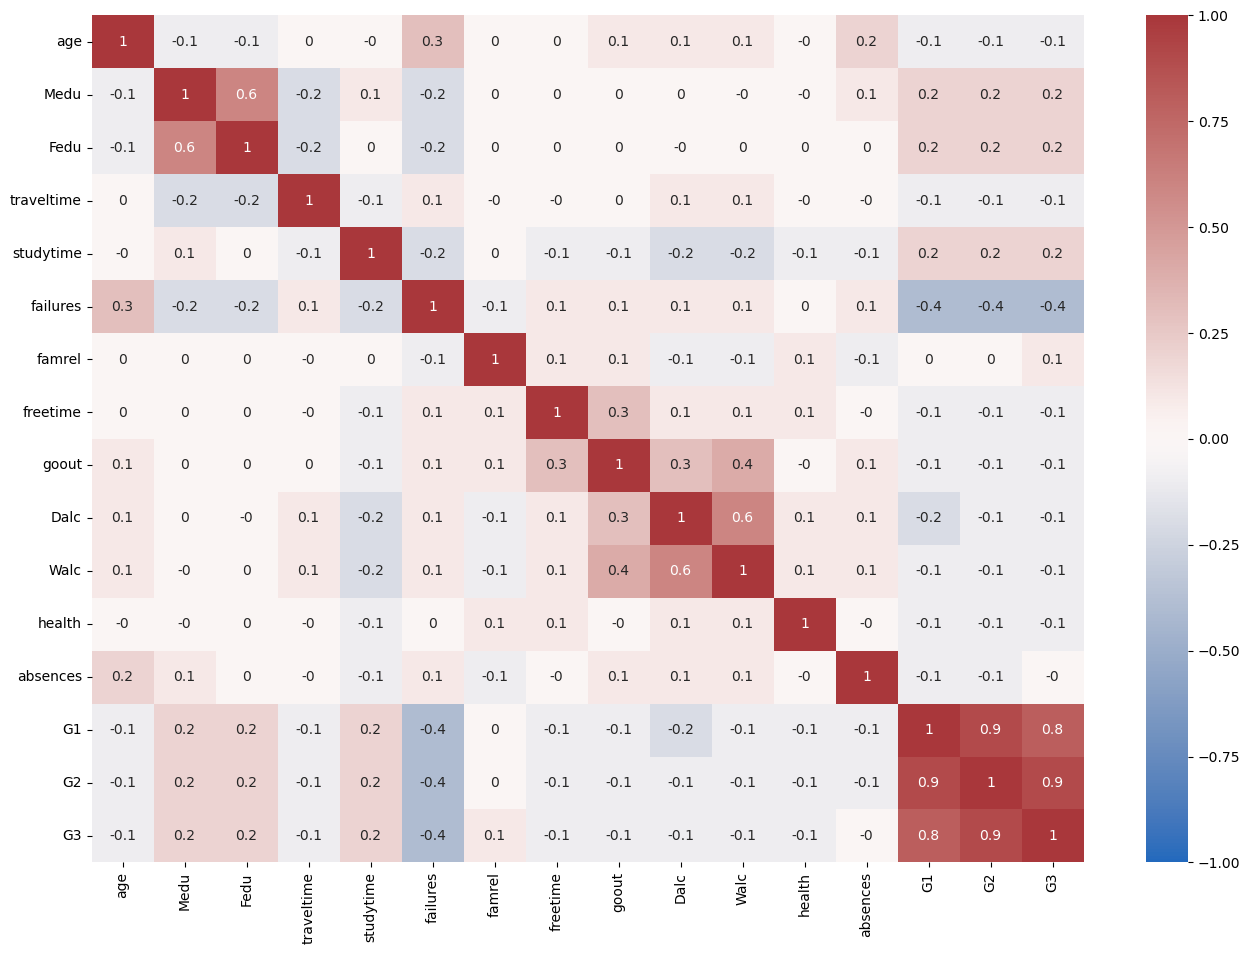

In [11]:
corr_matrix = df.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [12]:
print(df.corr()["G3"].sort_values(ascending = False))

G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


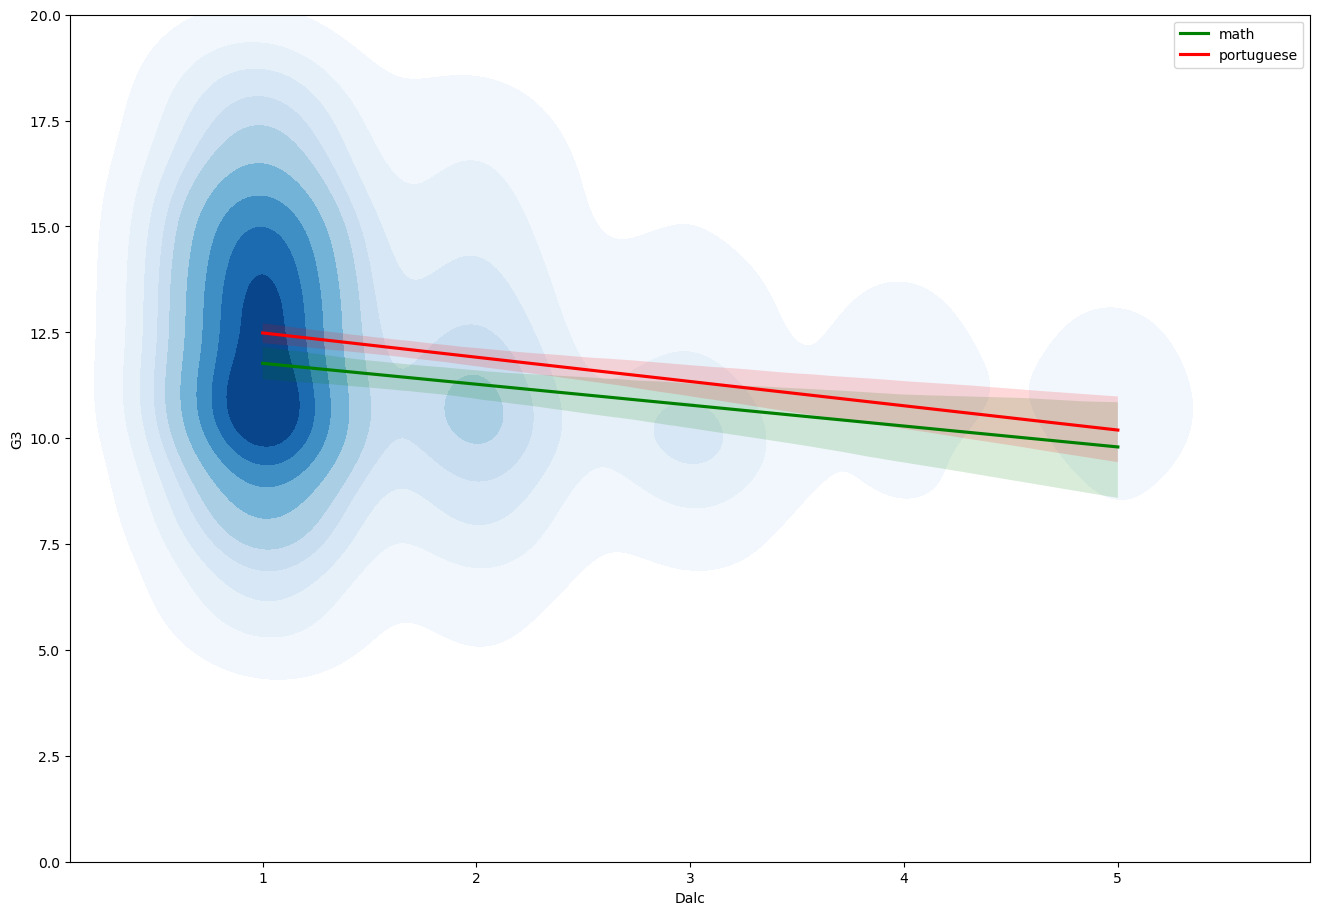

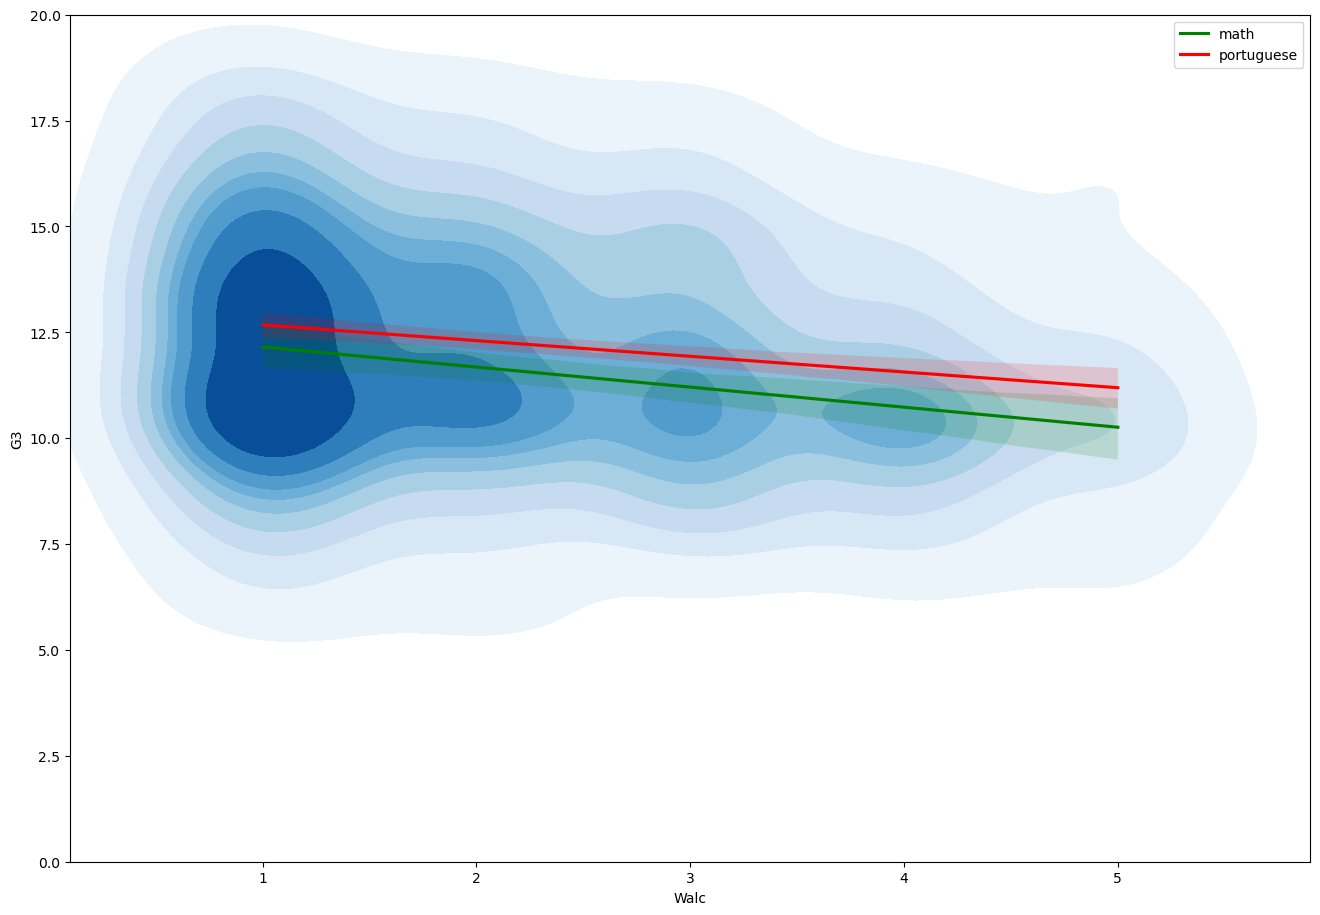

In [13]:
# Maybe remove score outliers? When they are removed the regression gradients are more similar but math has lower average score. Outliers could be due to people dropping the maths course or missing exam.
dfo=df[df["G3"]>1]
# dfo = df
dfm = dfo[dfo["class"] == "math"]
dfp = dfo[dfo["class"] == "portuguese"]

fig, ax = plt.subplots(figsize=(16,11))
sns.kdeplot(x=dfo["Dalc"], y=dfo["G3"], cmap="Blues",shade=True)

sns.regplot(x=dfm["Dalc"], y=dfm["G3"], scatter=False, color="Green", label="math")
sns.regplot(x=dfp["Dalc"], y=dfp["G3"], scatter=False, color="Red", label="portuguese")
plt.legend()
plt.ylim(0,20)
plt.xlim(0.1, 5.9)
plt.show()

fig, ax = plt.subplots(figsize=(16,11))
sns.kdeplot(x=dfo["Walc"], y=dfo["G3"], cmap="Blues",shade=True)
sns.regplot(x=dfm["Walc"], y=dfm["G3"], scatter=False, color="Green", label="math")
sns.regplot(x=dfp["Walc"], y=dfp["G3"], scatter=False, color="Red", label="portuguese")
plt.legend()
plt.ylim(0,20)
plt.xlim(0.1, 5.9)
plt.show()

# fig, ax = plt.subplots()
# sns.kdeplot(x=df["Walc"], y=df["G3"], cmap="Blues", shade=True)
# sns.regplot(x=df["Walc"], y=df["G3"], marker=" ", color="Red")
# plt.show()

# No missing data

# Categorical data

In [14]:
df["school"] = df["school"].apply(lambda x: 0 if x=="GP" else 1)
df["sex"] = df["sex"].apply(lambda x: 0 if x=="F" else 1)
df["address"] = df["address"].apply(lambda x: 0 if x=="U" else 1)
df["famsize"] = df["famsize"].apply(lambda x: 0 if x=="LE3" else 1)
df["Pstatus"] = df["Pstatus"].apply(lambda x: 0 if x=="A" else 1)
df["class"] = df["class"].apply(lambda x: 0 if x=="math" else 1)
df["schoolsup"] = df["schoolsup"].apply(lambda x: 0 if x=="no" else 1)
df["famsup"] = df["famsup"].apply(lambda x: 0 if x=="no" else 1)
df["paid"] = df["paid"].apply(lambda x: 0 if x=="no" else 1)
df["activities"] = df["activities"].apply(lambda x: 0 if x=="no" else 1)
df["nursery"] = df["nursery"].apply(lambda x: 0 if x=="no" else 1)
df["higher"] = df["higher"].apply(lambda x: 0 if x=="no" else 1)
df["internet"] = df["internet"].apply(lambda x: 0 if x=="no" else 1)
df["romantic"] = df["romantic"].apply(lambda x: 0 if x=="no" else 1)

#### One Hot Encoding 

In [15]:
OHE_mjob = pd.get_dummies(df["Mjob"], prefix="Mjob", drop_first=True)
OHE_fjob = pd.get_dummies(df["Fjob"], prefix="Fjob", drop_first=True)
OHE_reason = pd.get_dummies(df["reason"], prefix="reason", drop_first=True)
OHE_guardian = pd.get_dummies(df["guardian"], prefix="guardian", drop_first=True)

df = pd.concat([df, OHE_mjob, OHE_fjob, OHE_reason, OHE_guardian], axis = 1)

df.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace = True)

In [16]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,1,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,1,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,0,1,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,0,1,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,1,1,1,2,3,1,3,...,0,0,1,0,0,0,0,0,1,0
1040,1,0,18,0,0,1,3,1,1,2,...,1,0,0,1,0,0,0,0,1,0
1041,1,0,18,0,1,1,1,1,2,2,...,0,0,1,0,0,0,0,0,1,0
1042,1,1,17,0,0,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0


In [17]:
df.iloc[0]

school                0
sex                   0
age                  18
address               0
famsize               1
Pstatus               0
Medu                  4
Fedu                  4
traveltime            2
studytime             2
failures              0
schoolsup             1
famsup                0
paid                  0
activities            0
nursery               1
higher                1
internet              0
romantic              0
famrel                4
freetime              3
goout                 4
Dalc                  1
Walc                  1
health                3
absences              6
G1                    5
G2                    6
G3                    6
class                 0
Mjob_health           0
Mjob_other            0
Mjob_services         0
Mjob_teacher          0
Fjob_health           0
Fjob_other            0
Fjob_services         0
Fjob_teacher          1
reason_home           0
reason_other          0
reason_reputation     0
guardian_mother 

# Saving/loading clean data

In [18]:
# df.to_csv("data.csv", index = False)

In [19]:
# df = pd.read_csv("data.csv")

# Min-Max Scaling

In [20]:
y = np.array(df.pop("G3"))
X = np.array(df)

In [21]:
X_scaled = (X - np.amin(X)) / (np.amax(X) - np.amin(X))
X_scaled[0]

array([0.        , 0.        , 0.24      , 0.        , 0.01333333,
       0.        , 0.05333333, 0.05333333, 0.02666667, 0.02666667,
       0.        , 0.01333333, 0.        , 0.        , 0.        ,
       0.01333333, 0.01333333, 0.        , 0.        , 0.05333333,
       0.04      , 0.05333333, 0.01333333, 0.01333333, 0.04      ,
       0.08      , 0.06666667, 0.08      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01333333, 0.        , 0.        , 0.        ,
       0.01333333, 0.        ])